In [1]:
import os
import xarray as xr
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
from windrose import WindroseAxes

repertoire_courant=os.getcwd()
repertoire_figures=repertoire_courant+r"\\"+r"figures"+r"\\"
print(repertoire_courant)
repertoire_fichiers=repertoire_courant+r"\Outputs_EddyPro"+r"\\"
print("chargement des données")
T2_1_2min=xr.open_dataset(repertoire_fichiers+r"T2_LW_bas_2min_full_output.nc")
T2_2_2min=xr.open_dataset(repertoire_fichiers+r"T2_LW_haut_2min_full_output.nc")

T2_1_30min=xr.open_dataset(repertoire_fichiers+r"T2_LW_bas_30min_full_output.nc")
T2_2_30min=xr.open_dataset(repertoire_fichiers+r"T2_LW_haut_30min_full_output.nc")

spectres_1_2min=xr.open_dataset(repertoire_fichiers+r"T2_LW_bas_2min_spectres.nc")
spectres_2_2min=xr.open_dataset(repertoire_fichiers+r"T2_LW_haut_2min_spectres.nc")


spectres_1_30min=xr.open_dataset(repertoire_fichiers+r"T2_LW_bas_30min_spectres.nc")
spectres_2_30min=xr.open_dataset(repertoire_fichiers+r"T2_LW_haut_30min_spectres.nc")

ogives_1_30min=xr.open_dataset(repertoire_fichiers+r"T2_LW_bas_30min_ogives.nc")
ogives_2_30min=xr.open_dataset(repertoire_fichiers+r"T2_LW_haut_30min_ogives.nc")

#correction manuelle pour la direction du vent
T2_1_2min=T2_1_2min.assign(wind_dir=(T2_1_2min['wind_dir']+180)%360)
T2_2_2min=T2_2_2min.assign(wind_dir=(T2_2_2min['wind_dir']+180)%360)

T2_1_30min=T2_1_30min.assign(wind_dir=(T2_1_30min['wind_dir']+180)%360)
T2_2_30min=T2_2_30min.assign(wind_dir=(T2_2_30min['wind_dir']+180)%360)

z_T2_2_30min=xr.DataArray(np.ones(T2_2_30min.coords['temps'].values.size)*1.96,
                          dims=['temps'],
                          coords={'temps':('temps',T2_2_30min.coords['temps'].values)})
z_T2_2_2min=xr.DataArray(np.ones(T2_2_2min.coords['temps'].values.size)*1.96,
                          dims=['temps'],
                          coords={'temps':('temps',T2_2_2min.coords['temps'].values)})

T2_2_2min=T2_2_2min.assign(instrument_height=z_T2_2_2min)
T2_2_30min=T2_2_30min.assign(instrument_height=z_T2_2_30min)
#ouais on change d'unités, on passe des centimètre en mètres
T2_1_30min=T2_1_30min.assign(instrument_height=T2_1_30min.instrument_height/100.0)
T2_1_2min=T2_1_2min.assign(instrument_height=T2_1_2min.instrument_height/100.0)

def Ri_B(U,V,T_z,T_s,z):
    "retourne le nombre de Richardson Bulk, avec T_z et T_s les températures à la hauteur z (m) et en surface (en K)"
    return (9.81*(T_z-T_s)*0.01*z)/(T_s*(U**2+V**2))


Ri_1=Ri_B(T2_1_30min['u_mean'].values,T2_1_30min['v_mean'].values,T2_1_30min['ts_mean'].values,
          273.15,T2_1_30min['instrument_height'].values)
Ri_2=Ri_B(T2_2_30min['u_mean'].values,T2_2_30min['v_mean'].values,T2_2_30min['ts_mean'].values,
          273.15,T2_2_30min['instrument_height'].values)
tps_30min=T2_1_30min.coords['temps'].values

print(T2_1_2min['instrument_height'].values)
print(T2_2_30min)
print(T2_1_2min)
print("fait")

C:\Users\evanl\Documents\Stage IGE
chargement des données
[1.1  1.1  1.1  ... 1.14  nan  nan]
<xarray.Dataset>
Dimensions:                  (temps: 352)
Coordinates:
  * temps                    (temps) datetime64[ns] 2023-09-01T00:30:00 ... 2...
Data variables: (12/73)
    daytime                  (temps) int64 ...
    Tau                      (temps) float64 ...
    qc_Tau                   (temps) int64 ...
    H                        (temps) float64 ...
    qc_H                     (temps) int64 ...
    H_strg                   (temps) float64 ...
    ...                       ...
    v_mean                   (temps) float64 -1.188 2.625 ... 3.215 3.432
    w_mean                   (temps) float64 ...
    ts_mean                  (temps) float64 276.4 277.1 277.0 ... 277.8 278.0
    instrument_height        (temps) float64 1.96 1.96 1.96 ... 1.96 1.96 1.96
    wu_cov                   (temps) float64 ...
    vw_cov                   (temps) float64 ...
<xarray.Dataset>
Dimensions:

In [2]:
print(T2_1_30min['instrument_height'].values)
print(T2_2_30min['instrument_height'].values)
print(T2_1_2min['instrument_height'].values)
print(T2_2_2min['instrument_height'].values)

[1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1
 1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1
 1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1
 1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1
 1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1
 1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1
 1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1
 1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1  1.1
 1.1  1.1  1.1  1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14
 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14
 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14
 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14
 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14
 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14 1.14
 1.14 1.14 1.1

In [3]:
print(T2_1_30min['H'].values)
print(T2_2_30min['H'].values)

[-3.26690e+01 -3.14705e+01 -1.88763e+01 -1.15687e+01 -2.24944e+01
 -2.60767e+01 -2.11182e+01 -1.12021e+01 -6.14975e+00 -1.11164e+01
 -6.20559e+00 -1.10023e+01 -4.74320e+01 -1.65998e+01 -2.65020e+01
 -3.80566e+01 -4.41417e+01 -4.52405e+01 -3.81715e+01 -2.82959e+01
 -3.51125e+01 -3.79790e+01 -2.41863e+01 -3.04027e+01 -2.55132e+01
 -2.43829e+01 -2.75884e+01 -3.45164e+01 -2.76758e+01 -2.60929e+01
 -2.42881e+01 -2.60443e+01 -2.24251e+01 -2.70913e+01 -2.06493e+01
 -1.08803e+01 -1.14004e+01 -8.61762e+00 -1.42652e+01 -9.90186e+00
 -9.77150e+00 -3.43120e+00 -2.70303e+00  1.11629e+01 -1.71036e+00
  1.21905e+01 -1.32287e+01 -8.86229e+00 -5.62383e+00 -1.03187e+01
 -1.02964e+01 -8.63579e+00  3.97325e+00 -1.50291e+01 -2.62955e+01
 -1.10934e+01 -1.71960e+01 -5.68605e+00 -5.44199e+00 -1.05971e+01
 -1.91877e+01 -1.33683e+01 -2.29275e+01 -2.74880e+01 -2.45365e+01
 -1.28018e+01 -1.12954e+01 -3.51024e+01 -2.30067e+01 -2.05759e+01
 -2.94144e+01 -1.92299e+01 -1.38033e+00 -4.02817e+01 -2.25913e+01
 -2.90503e

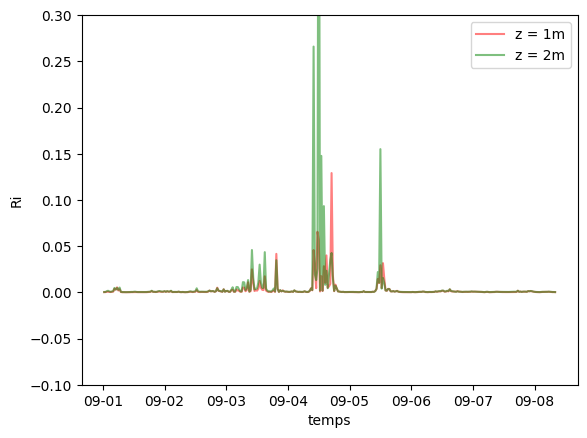

In [4]:
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax1=plt.subplot(111)
ax1.plot(tps_30min,Ri_1,color='r', label='z = 1m',alpha=0.5)
ax1.plot(tps_30min,Ri_2,color='g',label='z = 2m',alpha=0.5)
ax1.xaxis.set_major_formatter(date_format)
ax1.set_xlabel("temps")
ax1.set_ylabel(r"Ri")
ax1.set_ylim(-0.1,0.3)
ax1.legend()
plt.savefig(repertoire_figures+"T2L_evolution_Ri.png")

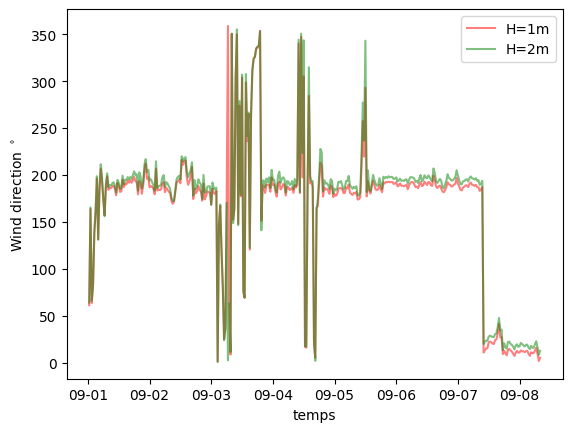

In [5]:
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min.coords['temps'].values,T2_1_30min['wind_dir'].values,color='r',label="H=1m",alpha=0.5)
ax.plot(T2_2_30min.coords['temps'].values,T2_2_30min['wind_dir'].values,color='g',label="H=2m",alpha=0.5)
#plt.axhline(200+30,color='r')
#plt.axhline(200-30,color='r')
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"Wind direction $^\circ$")
#ax.set_ylim(200-30,200+30)
ax.xaxis.set_major_formatter(date_format)

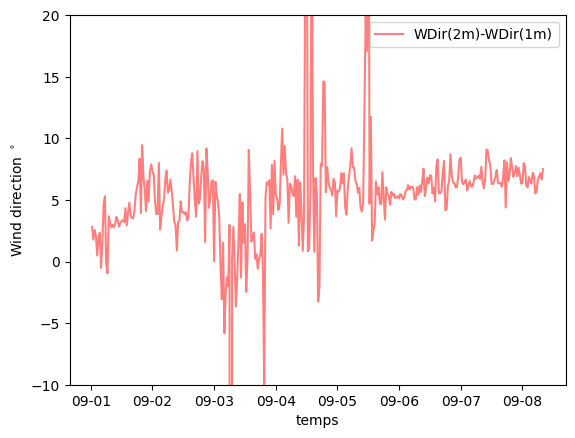

In [6]:
date_format=mpl.dates.DateFormatter("%m-%d")
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min.coords['temps'].values,T2_2_30min['wind_dir'].values-T2_1_30min['wind_dir'].values,
        color='r',label="WDir(2m)-WDir(1m)",alpha=0.5)

#plt.axhline(200+30,color='r')
#plt.axhline(200-30,color='r')
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"Wind direction $^\circ$")
ax.set_ylim(-10,20)
ax.xaxis.set_major_formatter(date_format)
plt.savefig(repertoire_figures+"T2_Left_WDir_shift.png")

Text(-0.08, 0.0, '$R^2$ = 0.105')

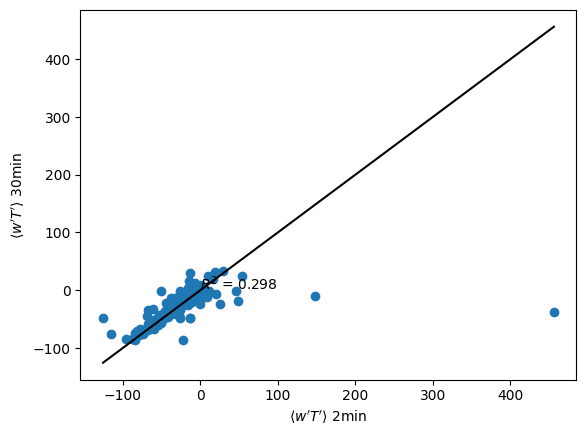

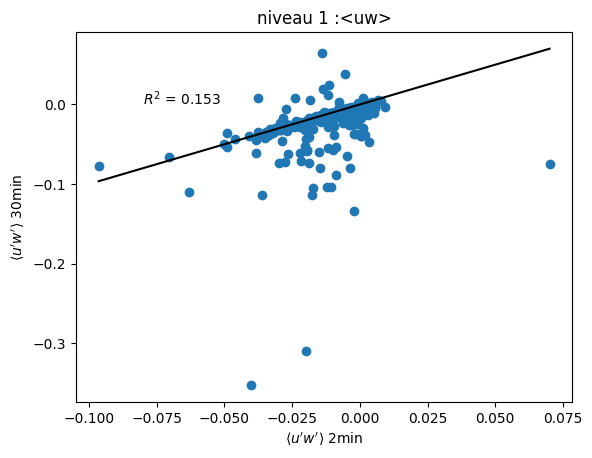

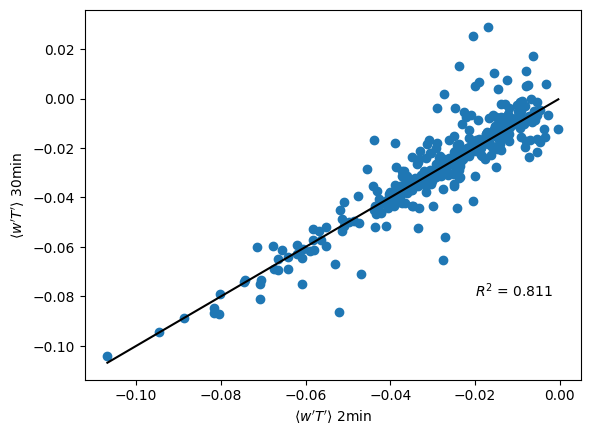

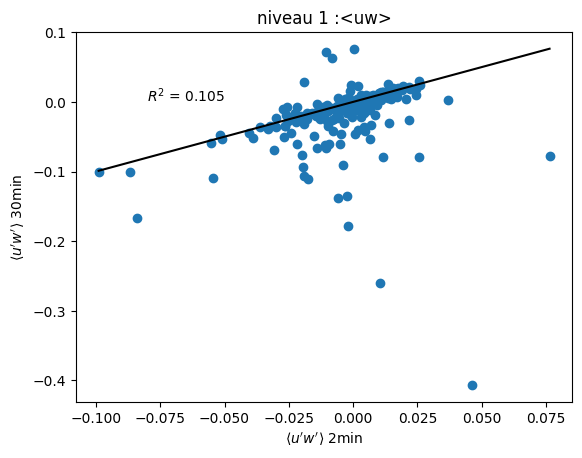

In [7]:
import Bulk

T2_1_2min_moy=T2_1_2min.coarsen(temps=15,side='left').mean()
T2_2_2min_moy=T2_2_2min.coarsen(temps=15,side='left').mean()

fig=plt.figure()
#plt.title("niveau 1 : H")
plt.scatter(T2_1_2min_moy['H'].values,T2_1_30min['H'].values)
plt.xlabel(r"$\langle w'T'\rangle$ 2min")
plt.ylabel(r"$\langle w'T'\rangle$ 30min")
Bulk.slope_1(T2_1_2min_moy['H'].values,color='k')
plt.text(-0.02,-0.08,r"$R^2$ = {}".format(np.around(Bulk.R_2(T2_1_2min_moy['H'].values,T2_1_30min['H'].values),3)))


fig=plt.figure()
plt.title("niveau 1 :<uw>")
plt.scatter(T2_1_2min_moy['wu_cov'].values,T2_1_30min['wu_cov'].values)
Bulk.slope_1(T2_1_2min_moy['wu_cov'].values,color='k')
plt.xlabel(r"$\langle u'w' \rangle$ 2min")
plt.ylabel(r"$\langle u'w' \rangle$ 30min")
plt.text(-0.08,0.0,r"$R^2$ = {}".format(np.around(Bulk.R_2(T2_1_2min_moy['wu_cov'].values,T2_1_30min['wu_cov'].values),3)))

fig=plt.figure()
#plt.title("niveau 1 : H")
plt.scatter(T2_2_2min_moy['wts_cov'].values,T2_2_30min['wts_cov'].values)
plt.xlabel(r"$\langle w'T'\rangle$ 2min")
plt.ylabel(r"$\langle w'T'\rangle$ 30min")
Bulk.slope_1(T2_2_2min_moy['wts_cov'].values,color='k')
plt.text(-0.02,-0.08,r"$R^2$ = {}".format(np.around(Bulk.R_2(T2_2_2min_moy['wts_cov'].values,T2_2_30min['wts_cov'].values),3)))


fig=plt.figure()
plt.title("niveau 1 :<uw>")
plt.scatter(T2_2_2min_moy['wu_cov'].values,T2_2_30min['wu_cov'].values)
Bulk.slope_1(T2_2_2min_moy['wu_cov'].values,color='k')
plt.xlabel(r"$\langle u'w' \rangle$ 2min")
plt.ylabel(r"$\langle u'w' \rangle$ 30min")
plt.text(-0.08,0.0,r"$R^2$ = {}".format(np.around(Bulk.R_2(T2_2_2min_moy['wu_cov'].values,T2_2_30min['wu_cov'].values),3)))


In [8]:
print(T2_1_30min['instrument_height'])

<xarray.DataArray 'instrument_height' (temps: 352)>
array([1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 ,
       1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 ,
       1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 ,
       1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 ,
       1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 ,
       1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 ,
       1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 ,
       1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 ,
       1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 ,
       1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.1 ,
       1.1 , 1.1 , 1.1 , 1.1 , 1.1 , 1.14, 1.14, 1.14, 1.14, 1.14, 1.14,
       1.14, 1.14, 1.14, 1.14, 1.14, 1.14, 1.14, 1.14, 1.14, 1.14, 1.14,
       1.14, 1.14, 1.14, 1.14, 1.14, 1.14, 1.14, 1.14, 1.14, 1.14, 1.14,

<>:37: SyntaxWarning: invalid escape sequence '\c'
<>:48: SyntaxWarning: invalid escape sequence '\c'
<>:37: SyntaxWarning: invalid escape sequence '\c'
<>:48: SyntaxWarning: invalid escape sequence '\c'
C:\Users\evanl\AppData\Local\Temp\ipykernel_13720\4195835845.py:37: SyntaxWarning: invalid escape sequence '\c'
  plt.text(0.25,0.05,Bulk.texte(us_Bulk_1,T2_1_2min_moy['H'].values,units='$m\cdot s^{-2}$'),transform=ax3.transAxes)
C:\Users\evanl\AppData\Local\Temp\ipykernel_13720\4195835845.py:48: SyntaxWarning: invalid escape sequence '\c'
  units='$m\cdot s^{-2}$'),
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.0, 1.0)

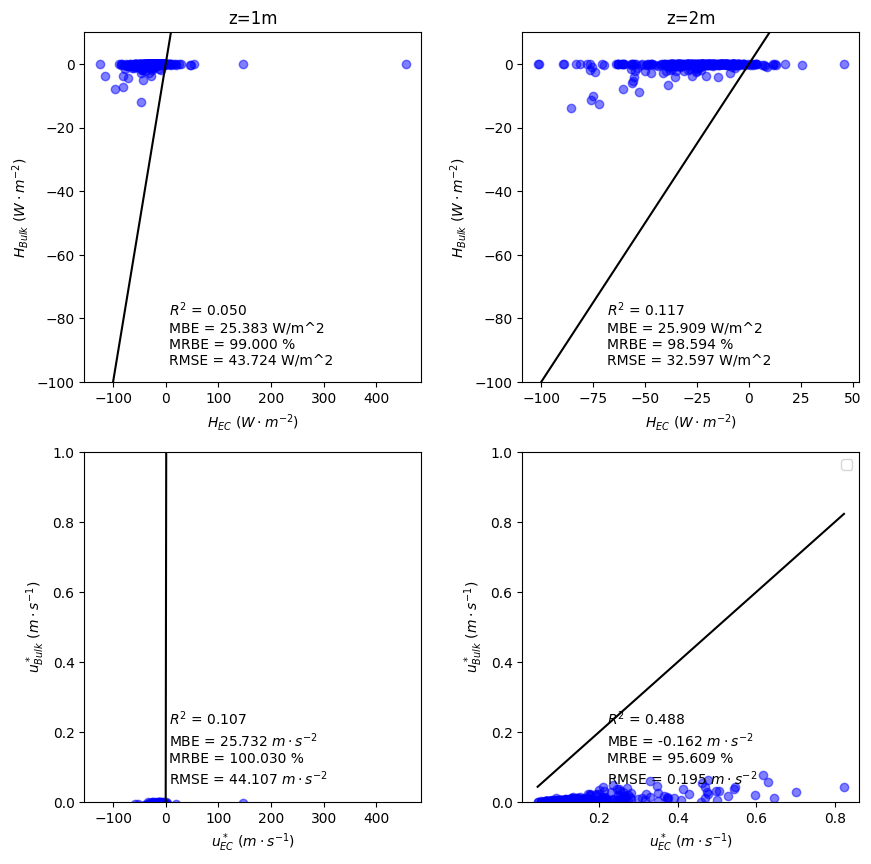

In [9]:
import Bulk
z_0=0.001#m
z_t=z_q=1.0e-1*z_0

H_Bulk_1=Bulk.H_bulk(T2_1_2min_moy,z0=z_0,zt=z_t).values
us_Bulk_1=Bulk.us_bulk(T2_1_2min_moy,z0=z_0).values

H_Bulk_2=Bulk.H_bulk(T2_2_2min_moy,z0=z_0,zt=z_t).values
us_Bulk_2=Bulk.us_bulk(T2_2_2min_moy,z0=z_0).values

fig=plt.figure(figsize=(10,10))
fig.subplots_adjust(wspace=0.3)
ax1=fig.add_subplot(221)
plt.title("z=1m")
plt.scatter(T2_1_2min_moy['H'].values,H_Bulk_1,alpha=0.5,color='b',
            label='z0='+str(z_0)+"m zt="+str(z_t)+"m")
Bulk.slope_1(T2_1_2min_moy['H'].values, color='k')
plt.text(0.25,0.05,Bulk.texte(H_Bulk_1,T2_1_2min_moy['H'].values),transform=ax1.transAxes)
plt.ylabel(r"$H_{Bulk}$ ($W\cdot m^{-2}$)")
plt.xlabel(r"$H_{EC}$ ($W\cdot m^{-2}$)")
plt.ylim(-100,10)

ax2=fig.add_subplot(222)
plt.title("z=2m")
plt.scatter(T2_2_2min_moy['H'].values,H_Bulk_2,color='b',alpha=0.5)
Bulk.slope_1(T2_2_2min_moy['H'].values, color='k')
plt.ylabel(r"$H_{Bulk}$ ($W\cdot m^{-2}$)")
plt.xlabel(r"$H_{EC}$ ($W\cdot m^{-2}$)")
plt.text(0.25,0.05,Bulk.texte(H_Bulk_2,T2_2_2min_moy['H'].values),transform=ax2.transAxes)
plt.ylim(-100,10)

ax3=fig.add_subplot(223)
plt.scatter(T2_1_2min_moy['H'].values,H_Bulk_1,color='b',alpha=0.5)
Bulk.slope_1(T2_1_2min_moy['H'].values, color='k')
plt.ylabel(r"$u^*_{Bulk}$ ($m\cdot s^{-1}$)")
plt.xlabel(r"$u^*_{EC}$ ($m\cdot s^{-1}$)")
plt.text(0.25,0.05,Bulk.texte(us_Bulk_1,T2_1_2min_moy['H'].values,units='$m\cdot s^{-2}$'),transform=ax3.transAxes)
plt.ylim(0,1)

ax4=fig.add_subplot(224)
plt.scatter(T2_2_2min_moy['u*'].values,us_Bulk_2,color='b',alpha=0.5)
Bulk.slope_1(T2_2_2min_moy['u*'].values, color='k')
plt.ylabel(r"$u^*_{Bulk}$ ($m\cdot s^{-1}$)")
plt.xlabel(r"$u^*_{EC}$ ($m\cdot s^{-1}$)")
plt.legend()
plt.text(0.25,0.05,Bulk.texte(us_Bulk_2,
                              T2_2_2min_moy['u*'].values,
                              units='$m\cdot s^{-2}$'),
                              transform=ax4.transAxes)
plt.ylim(0,1)

In [10]:
print(H_Bulk_1)
print(T2_1_30min['H'])

[-2.97881892e+00 -2.48811464e-01 -1.69701516e-01 -1.63440953e-01
 -1.05098389e+00 -1.08127663e+00 -1.42603936e+00 -4.09077409e-02
 -1.01337759e-02 -2.32654983e-02 -6.69198220e-03 -4.83239977e-02
 -1.67580369e-01 -4.88347471e-01 -9.98297572e-01 -1.20099890e+00
 -2.06013611e+00 -1.84340372e+00 -1.34785604e+00 -7.96229597e-01
 -5.11436004e-01 -3.61581159e-01 -4.42603720e-01 -3.35993121e-01
 -4.20773912e-02 -3.49764147e-01 -4.23480665e-01 -1.21820151e-01
 -9.52057641e-01 -6.24635580e-01 -1.02172463e+00 -4.47287405e-01
 -1.20635291e+00 -2.88560192e-01 -1.47311156e-01 -2.00243002e-02
 -1.21434220e-02 -1.82005834e-02 -6.74274183e-03 -7.92700585e-03
 -4.08165903e-02 -9.48712495e-03 -2.03831460e+00 -8.05733311e-02
 -1.29687916e-02 -1.32419252e-02 -9.96677610e-03 -5.62597427e-03
 -6.61582850e-03 -2.41371791e-03 -4.12613738e-02 -2.55948229e-02
 -1.58129934e-03 -4.24647386e-02 -5.06987472e-02 -1.51981513e-02
 -1.80706596e-02 -2.87774858e-02 -2.64488539e-03 -5.36918613e-03
 -5.56021619e-02 -1.26790

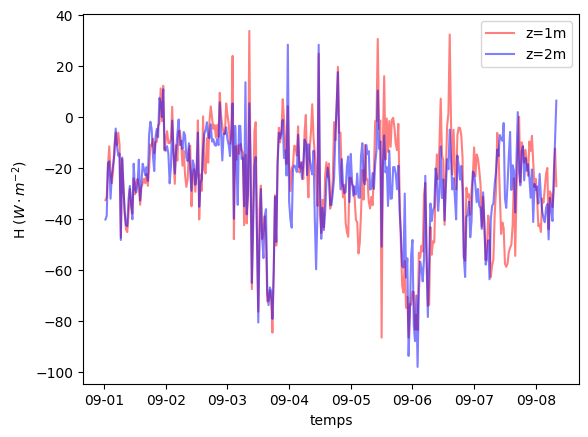

In [11]:
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(T2_1_30min.coords['temps'].values, T2_1_30min['H'].values,
        color='r',alpha=0.5,label='z=1m')
ax.plot(T2_2_30min.coords['temps'].values,T2_2_30min['H'].values,
        color='b',alpha=0.5,label='z=2m')

#plt.axhline(200+30,color='r')
#plt.axhline(200-30,color='r')
ax.legend()
ax.set_xlabel("temps")
ax.set_ylabel(r"H ($W\cdot m^{-2}$)")
ax.xaxis.set_major_formatter(date_format)

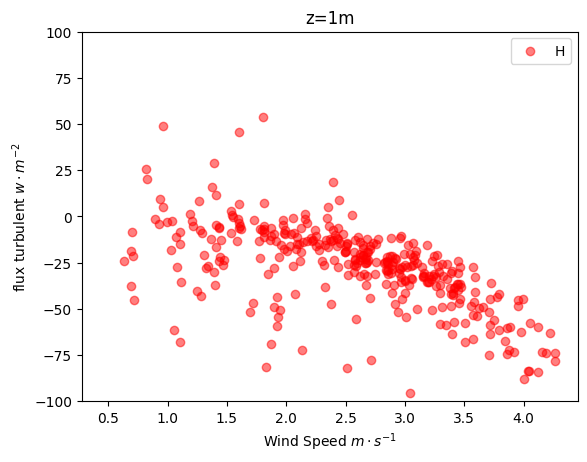

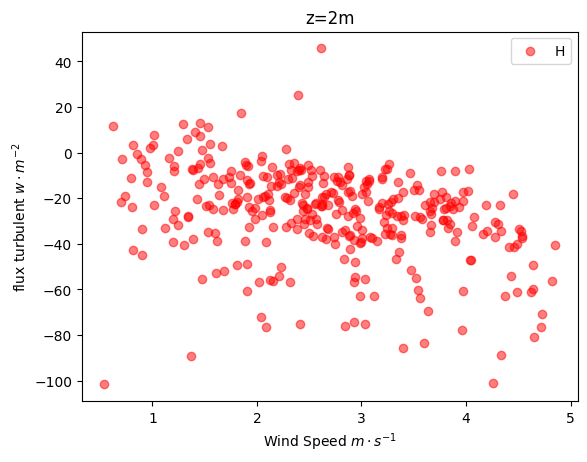

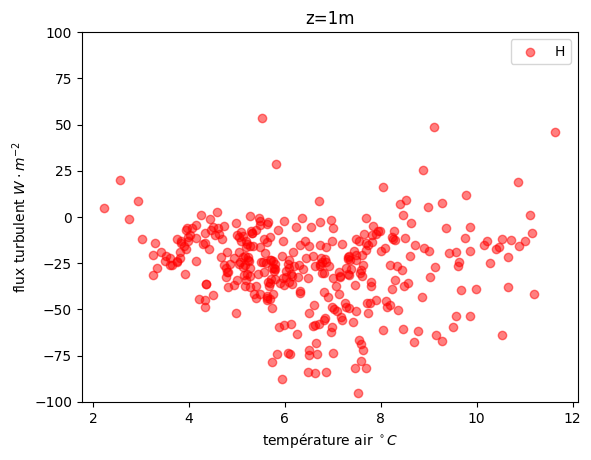

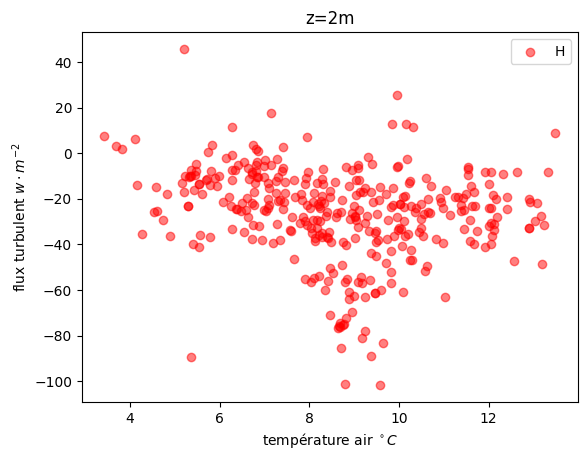

In [12]:
fig=plt.figure()
plt.title("z=1m")
plt.scatter(T2_1_2min_moy['u_rot'].values,T2_1_2min_moy['H'].values,color='r',label="H", alpha=0.5)
plt.xlabel(r"Wind Speed $m\cdot s^{-1}$")
plt.ylabel(r"flux turbulent $w\cdot m^{-2}$")
plt.ylim(-100,100)
plt.legend()
plt.savefig(repertoire_figures+"H_vs_u_T2L1.png")


fig=plt.figure()
plt.title("z=2m")
plt.scatter(T2_2_2min_moy['u_rot'].values,T2_2_2min_moy['H'].values,color='r',label="H", alpha=0.5)
plt.xlabel(r"Wind Speed $m\cdot s^{-1}$")
plt.ylabel(r"flux turbulent $w\cdot m^{-2}$")
plt.legend()
plt.savefig(repertoire_figures+"H_vs_u_T2L2.png")


fig=plt.figure()
plt.title("z=1m")
plt.scatter(T2_1_2min_moy['air_temperature'].values-273.15,T2_1_2min_moy['H'].values,color='r',label="H", alpha=0.5)
plt.xlabel(r"température air $^\circ C$")
plt.ylabel(r"flux turbulent $W\cdot m^{-2}$")
plt.ylim(-100,100)
plt.legend()
plt.savefig(repertoire_figures+"H_vs_T_T2L1.png")


fig=plt.figure()
plt.title("z=2m")
plt.scatter(T2_2_2min_moy['air_temperature'].values-273.15,T2_2_2min_moy['H'].values,color='r',label="H", alpha=0.5)
plt.xlabel(r"température air $^\circ C$")
plt.ylabel(r"flux turbulent $w\cdot m^{-2}$")
plt.legend()
plt.savefig(repertoire_figures+"H_vs_T_T2L2.png")